In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
df = pd.read_csv('cars1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,7,2016,21995.0,2,28526.0,0,160,50.4,2.0
1,2,2015,13995.0,1,27016.0,0,30,62.8,2.0
2,2,2016,18498.0,2,29845.0,1,160,45.6,2.0
3,3,2017,20000.0,0,44783.0,0,145,62.8,2.0
4,7,2014,12300.0,0,43195.0,0,200,47.9,2.0
...,...,...,...,...,...,...,...,...,...
295,3,2017,18700.0,1,20052.0,1,145,49.6,2.0
296,3,2015,17498.0,2,35903.0,0,145,56.5,2.0
297,1,2019,19995.0,1,7307.0,0,145,51.4,1.6
298,7,2015,17498.0,2,40256.0,0,160,50.4,2.0


In [41]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3.860000,2016.903333,21126.687312,1.113333,25919.846724,0.463333,119.200000,52.994333,1.891333
std,2.974878,1.642044,8793.663294,0.727268,19812.278562,0.499487,60.884176,10.396195,0.499423
min,0.000000,2013.000000,7000.000000,0.000000,10.000000,0.000000,0.000000,32.800000,1.000000
25%,1.000000,2016.000000,14993.750000,1.000000,10203.750000,0.000000,30.000000,47.100000,1.500000
50%,3.000000,2017.000000,18970.000000,1.000000,22476.000000,0.000000,145.000000,50.400000,2.000000
75%,7.000000,2018.000000,25991.250000,2.000000,35390.000000,1.000000,145.000000,61.400000,2.000000
max,12.000000,2020.000000,48348.638730,2.000000,86477.003452,1.000000,300.000000,83.100000,3.000000


In [42]:
df['age']=(2021-df['year'])
df['priceLevel']=np.where (df['price']<=21126,0,1)
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size,age,priceLevel
0,7,2016,21995.0,2,28526.0,0,160,50.4,2.0,5,1
1,2,2015,13995.0,1,27016.0,0,30,62.8,2.0,6,0
2,2,2016,18498.0,2,29845.0,1,160,45.6,2.0,5,0
3,3,2017,20000.0,0,44783.0,0,145,62.8,2.0,4,0
4,7,2014,12300.0,0,43195.0,0,200,47.9,2.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...
295,3,2017,18700.0,1,20052.0,1,145,49.6,2.0,4,0
296,3,2015,17498.0,2,35903.0,0,145,56.5,2.0,6,0
297,1,2019,19995.0,1,7307.0,0,145,51.4,1.6,2,0
298,7,2015,17498.0,2,40256.0,0,160,50.4,2.0,6,0


In [43]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['model','year','price','type','distance','fuel','tax','miles per galoon', 'size', 'age', 'priceLevel']).round()

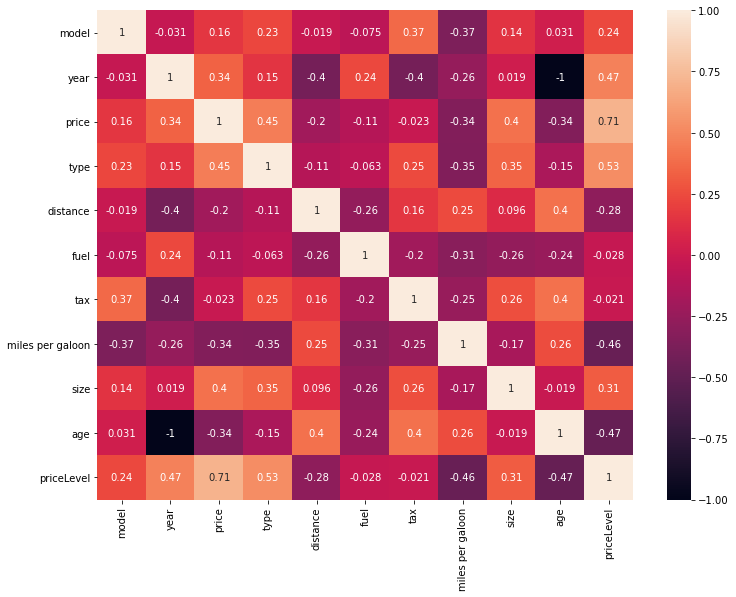

In [44]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

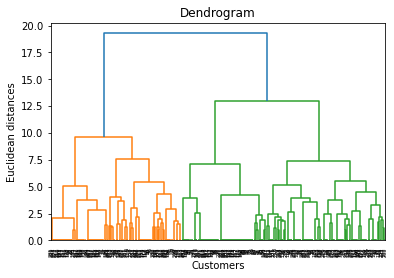

In [45]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [46]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [47]:
hc

array([4, 3, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 4, 0, 2, 2, 3,
       0, 3, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 4, 2, 3, 0,
       3, 0, 3, 2, 3, 0, 0, 0, 3, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 4, 1, 2,
       0, 0, 0, 2, 3, 1, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 3, 1, 1, 0, 4, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 3, 4, 0, 0, 1, 3, 1, 1, 3, 1, 1, 3, 2, 3, 3, 4, 0, 3, 2,
       0, 0, 1, 3, 2, 3, 0, 4, 3, 3, 2, 2, 0, 0, 4, 3, 2, 3, 1, 0, 2, 2,
       2, 0, 1, 2, 3, 2, 2, 2, 0, 3, 3, 3, 1, 0, 0, 3, 2, 3, 3, 1, 3, 2,
       2, 3, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 3, 0, 3, 0, 0, 1, 2, 2, 2, 0,
       0, 4, 3, 1, 3, 1, 1, 0, 1, 1, 1, 0, 3, 4, 3, 2, 1, 0, 0, 0, 1, 3,
       2, 3, 3, 4, 1, 3, 2, 2, 0, 0, 3, 0, 0, 0, 0, 2, 0, 4, 0, 4, 0, 0,
       4, 4, 2, 3, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 3, 2, 2, 0, 1, 3, 3,
       0, 2, 0, 2, 1, 0, 0, 0, 3, 2, 1, 2, 4, 0], d

In [48]:
# Less features
X = df.iloc[:, [2,7,9]]

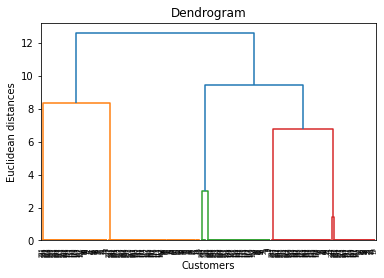

In [49]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [50]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [51]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('1-cluster.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()